In [503]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [504]:
df = pd.read_csv("D:/localrepo/data.csv",encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [506]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [507]:
# Summary statistics for categorical variables
df.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [508]:
df.isnull().sum()[["Description","CustomerID"]]

Description      1454
CustomerID     135080
dtype: int64

# Data Exploration and Cleaning: 

1:Provide a summary of the dataset (e.g., total number of transactions, total sales, average transaction value).\


In [509]:
total_trns=df['InvoiceNo'].nunique()
print("Total no of Transactions :",total_trns)

Total no of Transactions : 25900


In [510]:
# average Transaction value 
df['order_amt']=df['Quantity']*df['UnitPrice']
# group by on the invoiceNo 
df1=df.groupby('InvoiceNo')['order_amt'].agg(sum)    # sum of amount(invoice Wise)
df2=df.groupby('InvoiceNo')['Quantity'].agg(sum)     # sum of Quantity(Invoice Wise )



C:\Users\seemantk\AppData\Local\Temp\ipykernel_21596\3187031218.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1=df.groupby('InvoiceNo')['order_amt'].agg(sum)    # sum of amount(invoice Wise)
C:\Users\seemantk\AppData\Local\Temp\ipykernel_21596\3187031218.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2=df.groupby('InvoiceNo')['Quantity'].agg(sum)     # sum of Quantity(Invoice Wise )


In [511]:
Total_sales_qnty=df2.sum()
print("Total sales quantity wise :",Total_sales_qnty)

Total_sales_Amt=df1.sum()
print("Total sales amount wise :",Total_sales_Amt)


Total sales quantity wise : 5176450
Total sales amount wise : 9747747.934


 ### popular items(stock) according to Quantity sold .

In [512]:
top_10_stock=df['StockCode'].value_counts().head(10)
print("Popular stock :",top_10_stock)  # popular items(stock) according to Quantity sold .

Popular stock : StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64


### Conversion  the InvoiceDate column to a datetime format and extract relevant time-based features (e.g., year, month, day, hour)

In [513]:
df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])

df['year']=df["InvoiceDate"].dt.year
df['month']=df["InvoiceDate"].dt.month
df['Day']=df["InvoiceDate"].dt.dayofweek
df['Time']=df["InvoiceDate"].dt.time

In [514]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_amt,year,month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,08:26:00



### 2: Identify and handle any missing or inconsistent data. 

In [515]:

missing_data = df[["CustomerID","Description"]].isnull().sum()


In [516]:
missing_data


CustomerID     135080
Description      1454
dtype: int64

([0, 1], [Text(0, 0, 'CustomerID'), Text(0, 1, 'Description')])

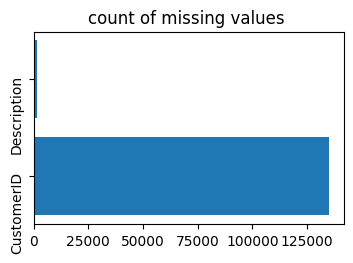

In [544]:
plt.figure(figsize=(4, 2.5))
plt.barh(missing_data.index ,missing_data)
plt.title("count of missing values ",)
plt.yticks(rotation=90)
# plt.ylabel("Missing Attribute")

In [518]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df=df.dropna(subset=['CustomerID', 'Description'])

In [519]:

# Group by StockCode and count unique descriptions
description_counts = df.groupby('StockCode')['Description'].nunique().reset_index()
description_counts.columns = ['StockCode', 'unique_descriptions']
# print(description_counts)

multiple_descriptions = description_counts[description_counts['unique_descriptions'] > 1]
multiple_descriptions


,StockCode,unique_descriptions
42,16156L,2
100,17107D,3
118,20622,2
170,20725,2
262,20914,2
...,...,...
3310,85184C,2
3311,85185B,2
3374,90014A,2
3375,90014B,2


We see that there are more than one description for a particular stock Number . \
So this shows that data is inconsistent and need to hnadle this to have a proper recommendation .


In [520]:
# to check if there is any negative Quantity 
df[df['Quantity']<0].shape[0]



8905

As we  see there are some quantity with the negative values so , form this we get that there are returns orders also with the Negative order Quantity .

In [521]:

df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

In [522]:
df[df["Transaction_Status"]=='Cancelled'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_amt,year,month,Day,Time,Transaction_Status
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,12,2,09:41:00,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,12,2,09:49:00,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,12,2,10:24:00,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,2,10:24:00,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,2,10:24:00,Cancelled


Checking of the Duplicates records \
These records might create a bias in the data and may leads to imporoper modeling of Model .

In [523]:
# Duplicates records 
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_amt,year,month,Day,Time,Transaction_Status
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,2010,12,2,11:45:00,Completed
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10,2010,12,2,11:45:00,Completed
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95,2010,12,2,11:45:00,Completed
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95,2010,12,2,11:45:00,Completed
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2.95,2010,12,2,11:49:00,Completed


2: Descriptive Analysis: 

Calculate the total revenue generated from sales.


In [524]:
# The total revenue generated from sales. 

print("Total Revenue =",df["order_amt"].sum())


Total Revenue = 8300065.814000001


Identify the top 10 best-selling products by revenue.

In [548]:

print("TOP 10 Sellling product ")
top10=df.groupby("StockCode")["order_amt"].agg(sum).sort_values(ascending=False).head(10)
top10

TOP 10 Sellling product 


C:\Users\seemantk\AppData\Local\Temp\ipykernel_21596\3223530979.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  top10=df.groupby("StockCode")["order_amt"].agg(sum).sort_values(ascending=False).head(10)


StockCode
22423     132870.40
85123A     93979.20
85099B     83236.76
47566      67687.53
POST       66710.24
84879      56499.22
23084      51137.80
22502      46980.95
79321      45936.81
22086      41500.48
Name: order_amt, dtype: float64

Determine the total number of unique customers. 

In [526]:
# unique customer
print("Total no of unique customer:",df['CustomerID'].unique()
.shape[0])


Total no of unique customer: 4372


In [527]:
unique_stock_grouped = df.groupby('StockCode').first().reset_index()
unique_stock_grouped[["StockCode","Description"]]


,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10123C,HEARTS WRAPPING TAPE
4,10124A,SPOTS ON RED BOOKCOVER TAPE
...,...,...
3679,D,Discount
3680,DOT,DOTCOM POSTAGE
3681,M,Manual
3682,PADS,PADS TO MATCH ALL CUSHIONS


#### 3: Sales Trends: 
Analyze sales trends over time ( monthly sales trends). 
 

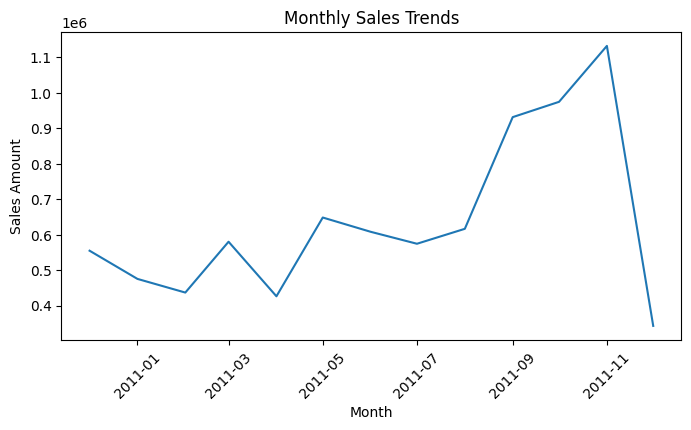

In [528]:
# Monthly sales trends
ms=df.groupby(['year','month'])['order_amt'].sum().to_frame('Monthly_sales').reset_index()
# ms
ms['date'] = pd.to_datetime(ms[['year', 'month']].assign(day=1))
# ms
# Now use this new 'date' column for the x-axis
plt.figure(figsize=(8, 4))
sns.lineplot(x='date', y='Monthly_sales', data=ms)

plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()
 

### Seasonal patterns in sales.	 

In [529]:
favorite_shopping_day = df.groupby(['Day']).size().reset_index(name='Count')

In [530]:
favorite_shopping_day['Count'].sort_values(ascending=False)
# top 3 Shopping day of week 
print("Favorite shopping days:\n",favorite_shopping_day['Count'].sort_values(ascending=False).index[0:3])


# 1- Tuesday 
# 2- Wednesday
# 3- thrusday 

Favorite shopping days:
 Index([3, 2, 1], dtype='int64')


In [531]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_amt,year,month,Day,Time,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,08:26:00,Completed


##### Calulating the Monthly spending of every customers 

In [532]:
# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'year', 'month'])['order_amt'].mean().reset_index()


In [533]:
mean_monthly_spending=monthly_spending.rename(columns={'order_amt':'mean_monthly_spending'})

In [534]:
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['order_amt'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns

,CustomerID,mean,std
0,12346.0,0.000000,NaN
1,12347.0,23.096997,4.062042
2,12348.0,66.789412,28.384587
3,12349.0,24.076027,NaN
4,12350.0,19.670588,NaN
...,...,...,...
4367,18280.0,18.060000,NaN
4368,18281.0,11.545714,NaN
4369,18282.0,13.956500,2.279005
4370,18283.0,2.805422,0.634902


In [549]:
seasonal_buying_patterns['std'].fillna(0, inplace=True)
seasonal_buying_patterns

C:\Users\seemantk\AppData\Local\Temp\ipykernel_21596\4205429586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seasonal_buying_patterns['std'].fillna(0, inplace=True)


,CustomerID,mean,std
0,12346.0,0.000000,0.000000
1,12347.0,23.096997,4.062042
2,12348.0,66.789412,28.384587
3,12349.0,24.076027,0.000000
4,12350.0,19.670588,0.000000
...,...,...,...
4367,18280.0,18.060000,0.000000
4368,18281.0,11.545714,0.000000
4369,18282.0,13.956500,2.279005
4370,18283.0,2.805422,0.634902


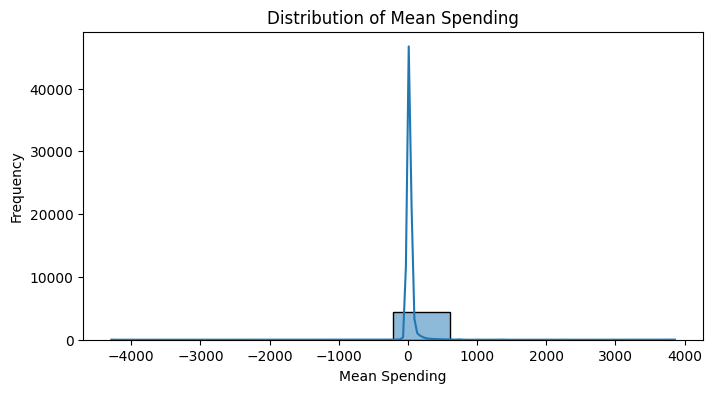

In [559]:
# Distribution of Mean Spending
plt.figure(figsize=(8, 4))
sns.histplot(seasonal_buying_patterns['mean'], bins=10, kde=True)
plt.title('Distribution of Mean Spending')
plt.xlabel('Mean Spending')
plt.ylabel('Frequency')
plt.show()




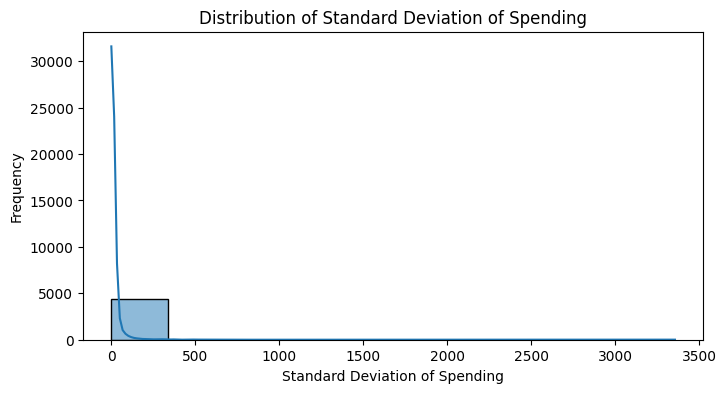

In [560]:
# Distribution of Standard Deviation
plt.figure(figsize=(8, 4))
sns.histplot(seasonal_buying_patterns['std'], bins=10, kde=True)
plt.title('Distribution of Standard Deviation of Spending')
plt.xlabel('Standard Deviation of Spending')
plt.ylabel('Frequency')
plt.show()


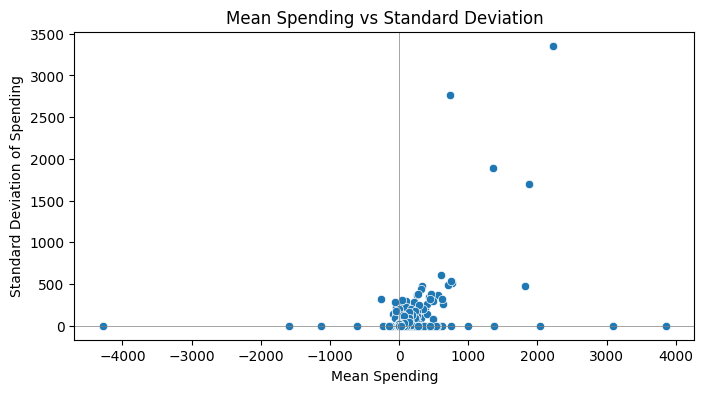

In [561]:
# Scatter plot to visualize relationship between mean spending and std
plt.figure(figsize=(8, 4))
sns.scatterplot(data=seasonal_buying_patterns, x='mean', y='std')
plt.title('Mean Spending vs Standard Deviation')
plt.xlabel('Mean Spending')
plt.ylabel('Standard Deviation of Spending')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.show()

In [555]:
# Calculate thresholds
mean_75th = seasonal_buying_patterns['mean'].quantile(0.75)
mean_25th = seasonal_buying_patterns['mean'].quantile(0.25)
std_median = seasonal_buying_patterns['std'].median()

# Define segments based on conditions
def segment_customer(row):
    if row['mean'] > mean_75th and row['std'] < std_median:
        return 'Loyal Premium Customers'
    elif row['mean'] < mean_25th and row['std'] > std_median:
        return 'Unpredictable Bargain Shoppers'
    elif row['mean'] > mean_75th and row['std'] > std_median:
        return 'High Value but Volatile Customers'
    elif row['mean'] < mean_25th and row['std'] < std_median:
        return 'Low Risk Bargain Shoppers'
    else:
        return 'Other'

# Apply the segmentation function
seasonal_buying_patterns['Segment'] = seasonal_buying_patterns.apply(segment_customer, axis=1)

# Display the segmented DataFrame
print(seasonal_buying_patterns[['CustomerID','Segment']].head(10))


   CustomerID                            Segment
0     12346.0          Low Risk Bargain Shoppers
1     12347.0                              Other
2     12348.0  High Value but Volatile Customers
3     12349.0                              Other
4     12350.0                              Other
5     12352.0                              Other
6     12353.0                              Other
7     12354.0                              Other
8     12355.0            Loyal Premium Customers
9     12356.0  High Value but Volatile Customers


Customer Analysis: 

Analyze customer purchasing behavior (e.g., average number of transactions per customer, average spend per customer). 



Average no Quanatity Purchaged by the customer 

In [538]:
customer_data=df.groupby(["CustomerID",'InvoiceNo'])


Avg_Quantity=customer_data["Quantity"].mean().groupby("CustomerID").mean().to_frame("AVG_Quantity_purchaged").reset_index()
Avg_Quantity


,CustomerID,AVG_Quantity_purchaged
0,12346.0,0.000000
1,12347.0,13.799245
2,12348.0,75.016176
3,12349.0,8.643836
4,12350.0,11.588235
...,...,...
4367,18280.0,4.500000
4368,18281.0,7.714286
4369,18282.0,3.771429
4370,18283.0,1.793069


The Toatal no of Transaction per customers

In [539]:
No_Trans_customer=customer_data["InvoiceNo"].sum().groupby("CustomerID").count().to_frame("Transaction_count").reset_index()
No_Trans_customer

,CustomerID,Transaction_count
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


 The most valuable customers (top 10% of customers by total spend). 

In [566]:
Total_spends=customer_data["order_amt"].sum().groupby("CustomerID").sum().to_frame("Total_spends").reset_index()
Total_spends.sort_values(by="Total_spends",ascending=False).head(10)

# Total_spends

,CustomerID,Total_spends
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
1345,14156.0,113384.14
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62653.10
2192,15311.0,59419.34


In [541]:
# clubbed all the result into a single form 
r1=pd.merge(No_Trans_customer,Avg_Quantity ,on='CustomerID' )
final_df =pd.merge(r1,Total_spends,on="CustomerID")
final_df

,CustomerID,Transaction_count,AVG_Quantity_purchaged,Total_spends
0,12346.0,2,0.000000,0.00
1,12347.0,7,13.799245,4310.00
2,12348.0,4,75.016176,1797.24
3,12349.0,1,8.643836,1757.55
4,12350.0,1,11.588235,334.40
...,...,...,...,...
4367,18280.0,1,4.500000,180.60
4368,18281.0,1,7.714286,80.82
4369,18282.0,3,3.771429,176.60
4370,18283.0,16,1.793069,2094.88


### Geographical Analysis: 

Analyze sales performance by country. 


In [491]:

df.head(1)
# df.groupby("")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_amt,year,month,Day,Time,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,08:26:00,Completed


In [492]:
country_Sales=df.groupby(["Country","InvoiceNo"])["order_amt"].sum().groupby("Country").sum().to_frame("Total sales").reset_index()

In [493]:
x=country_Sales.sort_values(by="Total sales",ascending=False).head(5)  #Top 5 countries by sales
x 

,Country,Total sales
35,United Kingdom,6767873.394
23,Netherlands,284661.540
10,EIRE,250285.220
14,Germany,221698.210
13,France,196712.840


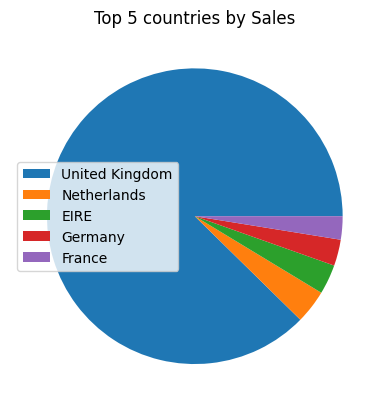

In [494]:
plt.pie(x["Total sales"])
plt.title("Top 5 countries by Sales")
plt.legend(x["Country"])


In [567]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.889509
Germany           0.023339
France            0.020871
EIRE              0.018398
Spain             0.006226
Name: proportion, dtype: float64


### Identify any countries with significant sales growth or decline. 

In [495]:

monthly_country_revenue=df.groupby(["Country","year","month"])["order_amt"].sum().reset_index()
monthly_country_revenue["date"]=pd.to_datetime(monthly_country_revenue[['year', 'month']].assign(day=1))

monthly_country_revenue

,Country,year,month,order_amt,date
0,Australia,2010,12,1005.10,2010-12-01
1,Australia,2011,1,9017.71,2011-01-01
2,Australia,2011,2,14627.47,2011-02-01
3,Australia,2011,3,17055.29,2011-03-01
4,Australia,2011,4,333.40,2011-04-01
...,...,...,...,...,...
293,Unspecified,2011,4,299.10,2011-04-01
294,Unspecified,2011,5,852.68,2011-05-01
295,Unspecified,2011,6,185.78,2011-06-01
296,Unspecified,2011,7,798.48,2011-07-01


In [496]:
# Pivot the table to have countries as columns and months as rows
monthly_country_pivot = monthly_country_revenue.pivot(index='date', columns='Country', values='order_amt')

C:\Users\seemantk\AppData\Local\Temp\ipykernel_21596\3292163639.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df3=monthly_country_pivot.pct_change().mean().to_frame("perentage_Change_month_wise").reset_index().head(10)
C:\Users\seemantk\AppData\Local\Temp\ipykernel_21596\3292163639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df3['Country'],y=df3['perentage_Change_month_wise'],palette="viridis")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Bahrain'),
  Text(3, 0, 'Belgium'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Channel Islands'),
  Text(7, 0, 'Cyprus'),
  Text(8, 0, 'Czech Republic'),
  Text(9, 0, 'Denmark')])

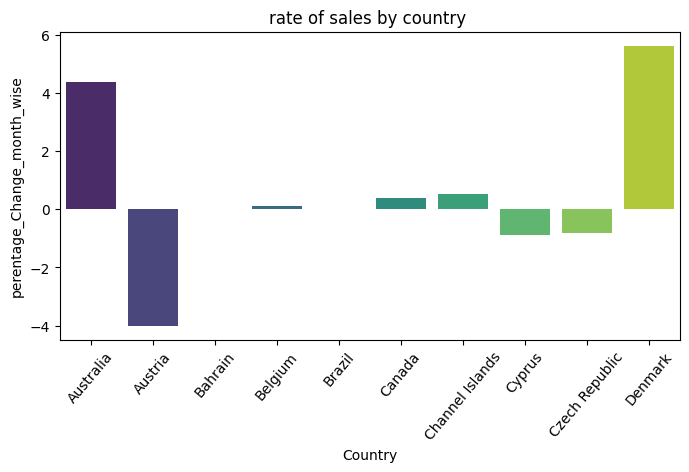

In [497]:
df3=monthly_country_pivot.pct_change().mean().to_frame("perentage_Change_month_wise").reset_index().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=df3['Country'],y=df3['perentage_Change_month_wise'],palette="viridis")
plt.title("rate of sales by country ")
plt.xticks(rotation=50)



In [568]:
df3

,Country,perentage_Change_month_wise
0,Australia,4.369919
1,Austria,-3.998299
2,Bahrain,0.000000
3,Belgium,0.122653
4,Brazil,0.000000
5,Canada,0.392553
6,Channel Islands,0.523725
7,Cyprus,-0.879438
8,Czech Republic,-0.815128
9,Denmark,5.621249


#### Recommendations: 
Based on your analysis, provide three actionable recommendations for improving sales performance. 

1: To decrease the return Items this will definitely help in increase in the rate of revenue of the company\
2: Focus on bestselling items, Increase the stock availability of the Top 10 selling products, in order to maximize the revenue.\
3: To add discounts over the products which are having less sales. This will give the boost to the overall sales of the company.\
4: Try to enhance the sales in the season, Provides offer in season to increase the sales of products
 

### Machine Learning Model for the prediction of purchase in Next month by customer

In [498]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix,classification_report

In [499]:
# Feature Engineering
# Calculate Recency, Frequency, and Monetary value
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date
df['Revenue'] = df['Quantity'] * df['UnitPrice']
rfc = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'order_amt': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'order_amt': 'MonetaryValue'
}).reset_index()
 
# # Create a target variable (purchase in the next month)
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
next_month_purchases = df.groupby(['CustomerID', 'InvoiceMonth'])['InvoiceNo'].count().reset_index()
next_month_purchases['NextMonthPurchase'] = next_month_purchases['InvoiceNo'].apply(lambda x: 1 if x > 0 else 0)
 
# # Merge the target variable with the customer features
# does they had made any purchase in last transaction date month
last_month = df['InvoiceMonth'].max()
current_month_data = next_month_purchases[next_month_purchases['InvoiceMonth'] == last_month]  

rfc = pd.merge(rfc, current_month_data[['CustomerID', 'NextMonthPurchase']], on='CustomerID', how='left')
rfc['NextMonthPurchase'] = rfc['NextMonthPurchase'].fillna(0)
 

 
# # Split the data into training and testing sets
X = rfc[['Recency', 'Frequency', 'MonetaryValue']]
y = rfc['NextMonthPurchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# # Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
 
# # Predict the test set
y_pred = model.predict(X_test)
 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
 
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
 

Accuracy: 0.993140243902439
Confusion Matrix:
[[1103    9]
 [   0  200]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1112
         1.0       0.96      1.00      0.98       200

    accuracy                           0.99      1312
   macro avg       0.98      1.00      0.99      1312
weighted avg       0.99      0.99      0.99      1312

